# Import Libraries


In [52]:
!pip install xgboost

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.model_selection  import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Load Data

In [54]:
test=pd.read_csv("data.csv")
train=pd.read_csv("data.csv")

# order the data

In [55]:
# Save target and test IDs
y = train["SalePrice"]
test_ids = test["Id"]

# Drop target and Ids from features
train.drop(["SalePrice", "Id"], axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

In [56]:
y=np.log(y)

In [57]:
data = pd.concat([train, test], axis=0)

In [58]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,NaN
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,NaN
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,NaN


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuilt    

In [60]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2920.000000,2402.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2904.000000,2920.000000,2920.000000,...,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.293325,24.279694,9979.555080,1.382760,1.112609,30.197730,20.641870,181.035018,456.019958,161.291638,...,125.317323,66.244678,61.108679,29.312308,55.747864,40.170424,496.038036,2.703163,1.327868,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [61]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       518
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1460
Length: 80, dtype: int64

# Data visualization

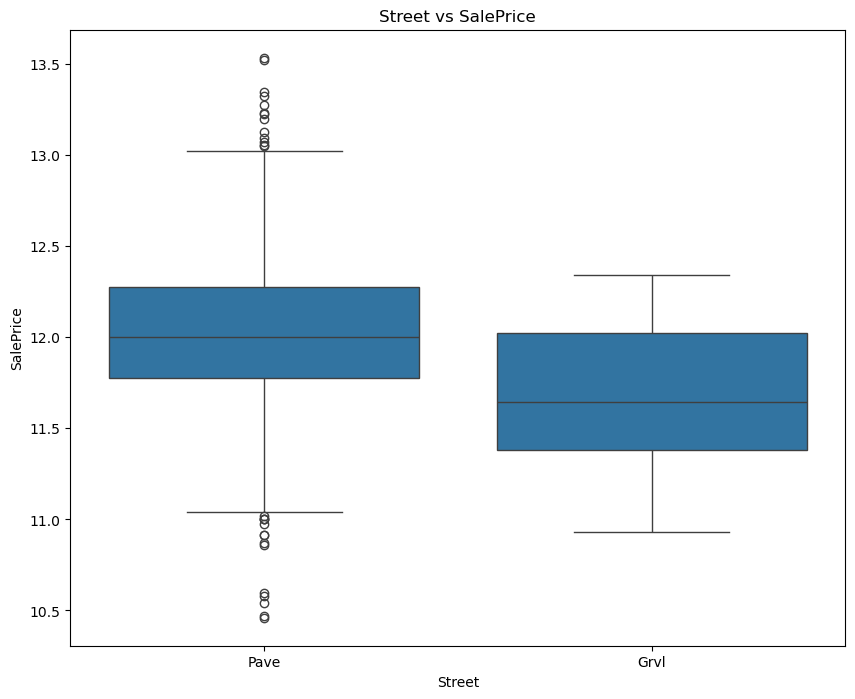

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Street',y=y,data=train)
plt.title('Street vs SalePrice')
plt.show()

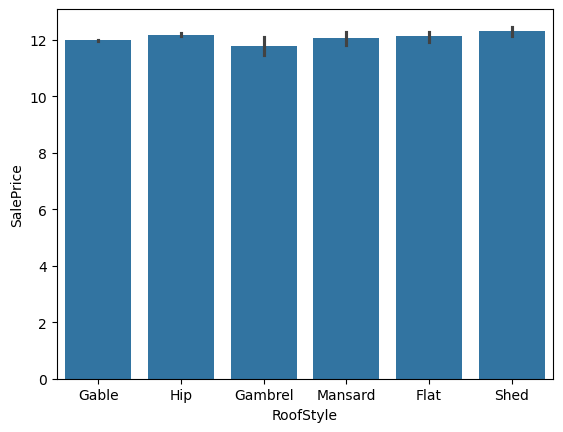

In [63]:
plt.figure()
sns.barplot(x='RoofStyle',y=y,data=train)
plt.show()


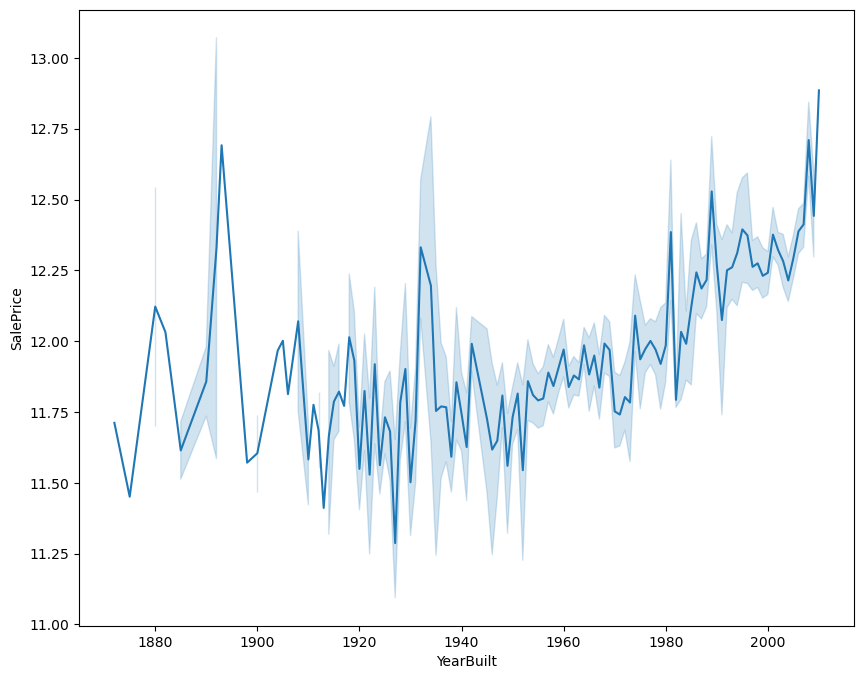

In [64]:
plt.figure(figsize=(10,8))
sns.lineplot(x='YearBuilt',y=y,data=train)
plt.show()

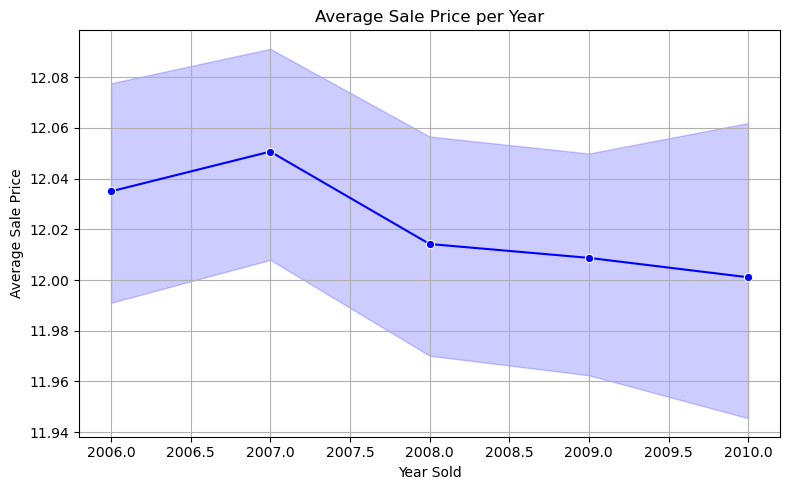

In [65]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='YrSold', y=y, data=train, marker='o', color='blue')
plt.title('Average Sale Price per Year')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.tight_layout()
plt.show()

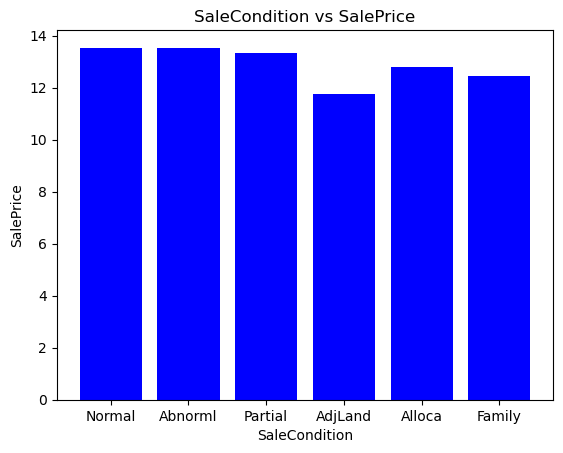

In [66]:
plt.figure()
plt.bar(train['SaleCondition'],y,color='b')
plt.title('SaleCondition vs SalePrice')
plt.xlabel('SaleCondition')
plt.ylabel('SalePrice')
plt.show()

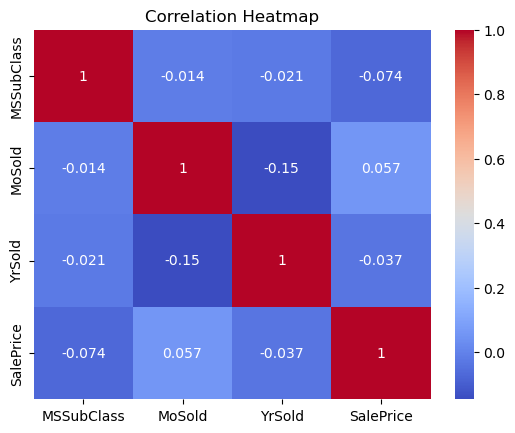

In [67]:
selected_features = train[['MSSubClass','MoSold','YrSold']].copy()
selected_features['SalePrice'] = y 
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Cleaning

In [68]:
def fill_missing(col):
    if col.dtype == 'object':
        return col.fillna(col.mode()[0] )
    else:
        return col.fillna(col.mean())


In [69]:
data=data.apply(fill_missing)

In [70]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Feature Engineering

In [71]:
data["HouseAge"] = data["YrSold"] - data["YearBuilt"]

In [72]:
data["HasPool"] = (data["PoolArea"] > 0).astype(int)

In [73]:
data["HasGarage"] = (data["GarageArea"] > 0).astype(int)
data["HasBsmt"] = (data["TotalBsmtSF"] > 0).astype(int)

#  Preprocessing

In [74]:
OE=OrdinalEncoder()

In [75]:
obj_data=data.select_dtypes('object')

In [76]:
obj_data=OE.fit_transform(obj_data)

In [77]:
data[data.select_dtypes('object').columns]=obj_data

In [78]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,HasPool,HasGarage,HasBsmt
0,60,3.0,65.0,8450,1.0,0.0,3.0,3.0,0.0,4.0,...,0,2,2008,8.0,4.0,180921.19589,5,0,1,1
1,20,3.0,80.0,9600,1.0,0.0,3.0,3.0,0.0,2.0,...,0,5,2007,8.0,4.0,180921.19589,31,0,1,1
2,60,3.0,68.0,11250,1.0,0.0,0.0,3.0,0.0,4.0,...,0,9,2008,8.0,4.0,180921.19589,7,0,1,1
3,70,3.0,60.0,9550,1.0,0.0,0.0,3.0,0.0,0.0,...,0,2,2006,8.0,0.0,180921.19589,91,0,1,1
4,60,3.0,84.0,14260,1.0,0.0,0.0,3.0,0.0,2.0,...,0,12,2008,8.0,4.0,180921.19589,8,0,1,1


# Split Data

In [79]:
X = data.iloc[:len(y), :] 
X_test = data.iloc[len(y):, :]  


x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [80]:
LR=LinearRegression()

In [81]:
LR.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred_lr=LR.predict(x_valid)

In [83]:
rmse_lr=np.sqrt(mean_squared_error(y_valid,y_pred_lr))

In [84]:
rmse_lr

np.float64(0.16575435749378786)

# Random Forest Regression 

In [85]:
RF=RandomForestRegressor(max_depth=100)

In [86]:
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=100)

In [87]:
y_pred_rf=RF.predict(x_valid)

In [88]:
rmse_rf=np.sqrt(mean_squared_error(y_valid,y_pred_rf))
rmse_rf

np.float64(0.1478176254065274)

# XGB Regression

In [89]:
 xgb=XGBRegressor( n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.5,
    random_state=42)

#  Model Training

In [90]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

#  Validation + RMSE

In [91]:
y_pred_xgb=xgb.predict(x_valid)

In [92]:
rmse_xgb=np.sqrt(mean_squared_error(y_valid,y_pred_xgb))
print("Log RMSE:", rmse_xgb)

Log RMSE: 0.13285431060443403


# Test Predictions

In [93]:
y_pred_test = xgb.predict(X_test)

In [94]:
y_pred_test = np.expm1(y_pred_test)

# result File

In [95]:
result=pd.DataFrame({
    "Id":test_ids,
     "SalePrice": y_pred_test
})

In [100]:
result.head(10)

,Id,SalePrice
0,1,202728.015625
1,2,176856.796875
2,3,215308.718750
3,4,146136.531250
4,5,280609.156250
5,6,148910.156250
6,7,298080.031250
7,8,209123.031250
8,9,129697.937500
9,10,121224.195312


In [97]:
result.to_csv("result.csv", index=False)